import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [2]:
# Data cleaning

# Reading whale returns
whale_returns_csv = Path("whale_returns.csv")
whale = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale.sort_index(inplace=True)
whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale = whale.dropna()

In [5]:
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [6]:
# Reading algorithmic returns
algo_returns_csv = Path("algo_returns.csv")
algo_data = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_data.sort_index(inplace=True)
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_data = algo_data.dropna()

In [9]:
#Count nuls again after dropping
algo_data.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [10]:
#  S&P 500 Returns
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("sp500_history.csv")
sp500_data = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_data.sort_index(inplace=True)
sp500_data.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [11]:
# Check Data Types
sp500_data.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types

# Strip out the $ with str.replace('$', '') and then us df.astype('float')

sp500_data['Close'] = sp500_data['Close'].str.replace('$', '').astype('float')

sp500_data.dtypes

C:\Users\suzan\AppData\Local\Temp/ipykernel_2456/2878298569.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_data['Close'] = sp500_data['Close'].str.replace('$', '').astype('float')


Close    float64
dtype: object

In [13]:
 # Calculate the daily return using the 'pct_change()' function
daily_returns = sp500_data.pct_change()
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [14]:
# Drop nulls
daily_returns = daily_returns.dropna()

# Confirm nulls are gone
daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [15]:
# Rename Column
daily_returns = daily_returns.rename(columns={
    "Close": "S&P 500"
})

daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [16]:
# Concatenate all DataFrames into a single DataFrame
combined_all = pd.concat([whale, algo_data, daily_returns], axis='columns', join='inner')
combined_all

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


<AxesSubplot:xlabel='Date'>

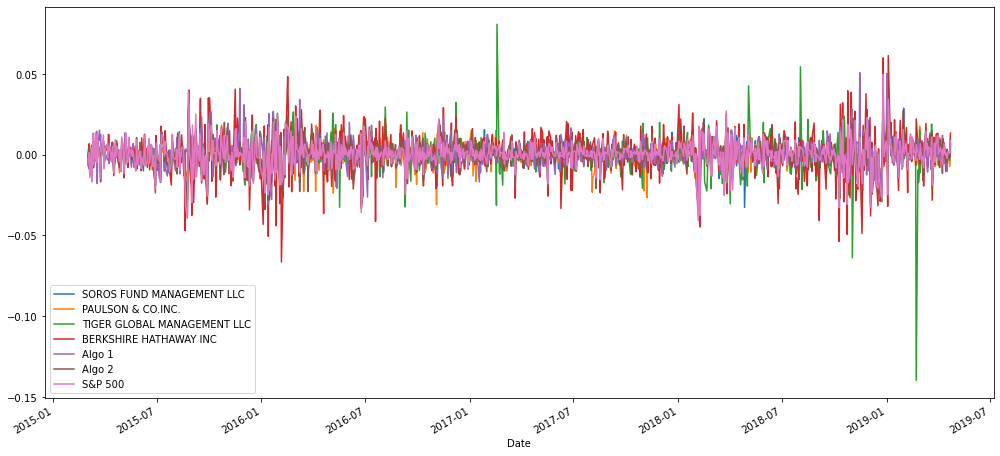

In [17]:
# H1 PORTFOLIO ANALYSIS
# H2 PERFORMANCE

# Plot the daily returns of the S&P 500 over the last 5 years
combined_all.plot(figsize=(17,8))

# Slice DataFrame into 5 year timeframe
# daily_return_5_year = combined_data.loc['2015-07-01':'2019-01-30'].plot(figsize=(12,5))

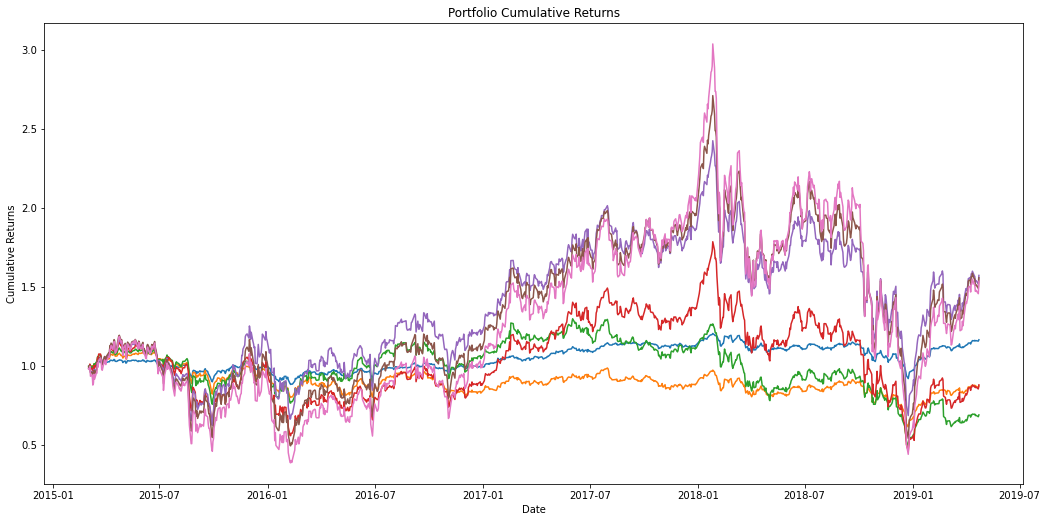

In [18]:
# Plot cumulative returns

# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

port_ret = combined_all.cumsum(axis=1)
# axis =1 tells pandas we want to add


cumulative_ret = (port_ret + 1).cumprod()

fig = plt.figure(figsize=(17,8))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(cumulative_ret)
ax1.set_xlabel('Date')
ax1.set_ylabel("Cumulative Returns")
ax1.set_title("Portfolio Cumulative Returns")
plt.show()

<AxesSubplot:>

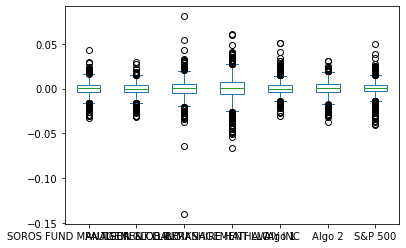

In [19]:
# RISK
# Box plot to visually show risk
combined_all.plot.box()

In [20]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
daily_std = combined_all.std()
daily_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

# Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head(7)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

<AxesSubplot:xlabel='Date'>

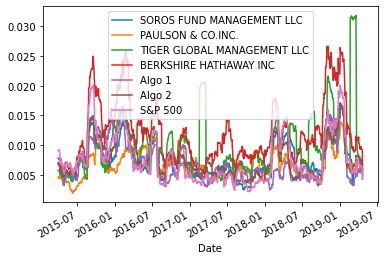

In [22]:
# ROLLING STATISTICS
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window

# Plot a rolling 21-day std dev of the S&P 500's and whale
combined_all.rolling(window=21).std().plot()

In [23]:
# Construct a correlation table
# Use the `corr` function on the combined DataFrame to calculate and output a correlation table

correlation = combined_all.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [24]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)

# Calculate covariance of all daily returns of BERKSHIRE HATHAWAY INC vs. S&P 500
covariance = combined_all['BERKSHIRE HATHAWAY INC'].cov(daily_returns['S&P 500'])
covariance

8.302834941861666e-05

In [25]:
# Calculate variance of all daily returns of BERKSHIRE HATHAWAY INC vs. S&P 500
variance = combined_all['S&P 500'].var()
variance

7.316632424648712e-05

In [26]:
 # Calculate beta of all daily returns of Berkshire
berkshire_beta = covariance / variance
berkshire_beta

1.1347891297491692

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of BERKSHIRE HATHAWAY INC Returns vs. S&P 500 Returns'}, xlabel='Date'>

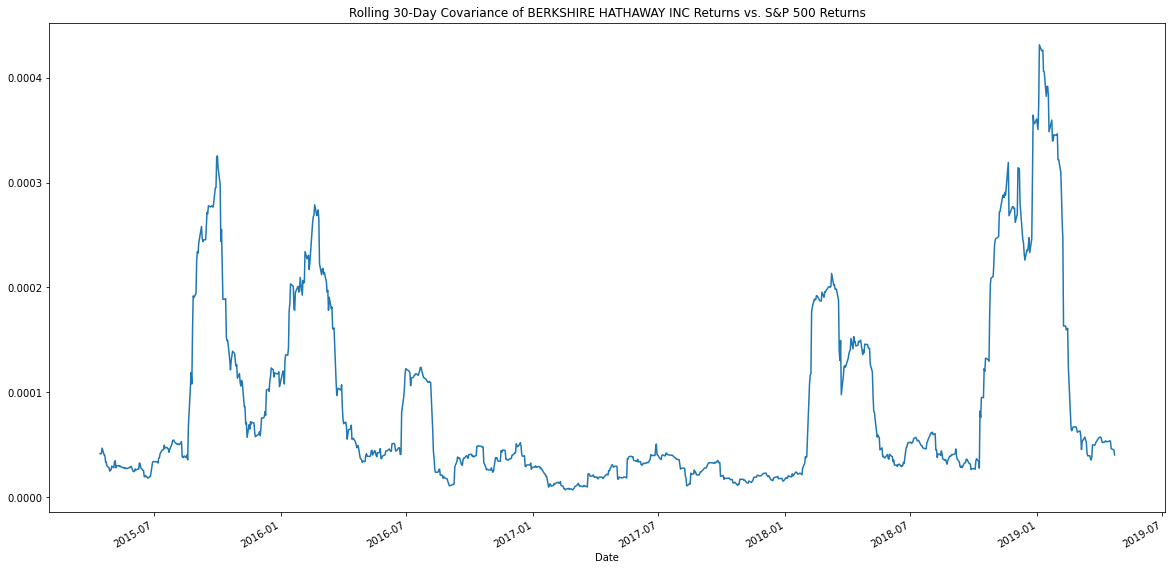

In [27]:
# Calculate 30-day rolling covariance of BERKSHIRE HATHAWAY INC vs. S&P 500 and plot the data
rolling_covariance = combined_all['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(combined_all['S&P 500'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of BERKSHIRE HATHAWAY INC Returns vs. S&P 500 Returns')

# Calculate a rolling window using the exponentially weighted moving average. 

In [28]:
# Calculate annualized Sharpe Ratios
# Calculate Sharpe Ratio
sharpe_ratios = (combined_all.mean() * 252) / (combined_all.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

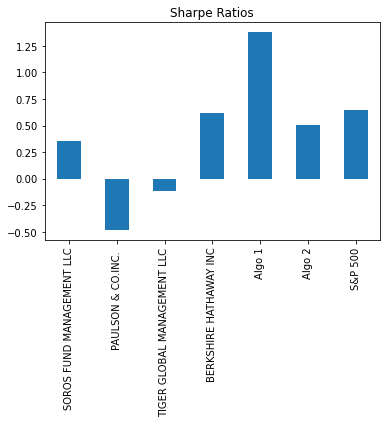

In [29]:
 # Plot sharpe ratios
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [30]:
# Visit Google Sheets and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
# I download the data as a CSV file. 
# I'm calculating the returns for each stock.

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [31]:
# Use the Pathlib libary to set the path to the CSV
AMX_csv = Path("AMX.csv")
T_csv = Path("T1.csv")
VZ1_csv = Path("VZ.csv")

In [32]:
# Read the first stock
amx_df = pd.read_csv(AMX_csv)

# Use the `insert` function to randomly generate 'AMX'down this new column
amx_df.insert(0, 'Symbol', 'AMX' )

#rename the columns
amx_df = amx_df.rename(columns={
    "Close": "NOCP",
    "Date": "Trade DATE"
})

 # Use a list of re-ordered column names to alter the column order of the original DataFrame
amx_df = amx_df[["Trade DATE", "Symbol", "NOCP"]]

amx_df.head()# Read the first stock
amx_df = pd.read_csv(AMX_csv)

# Use the `insert` function to randomly generate 'AMX'down this new column
amx_df.insert(0, 'Symbol', 'AMX' )

# rename the columns
amx_df = amx_df.rename(columns={
    "Close": "NOCP",
    "Date": "Trade DATE"
})

 # Use a list of re-ordered column names to alter the column order of the original DataFrame
amx_df = amx_df[["Trade DATE", "Symbol", "NOCP"]]

amx_df.head()

,Trade DATE,Symbol,NOCP
0,10/1/2012 16:00:00,AMX,25.64
1,10/2/2012 16:00:00,AMX,25.64
2,10/3/2012 16:00:00,AMX,25.47
3,10/4/2012 16:00:00,AMX,25.93
4,10/5/2012 16:00:00,AMX,26.35


In [33]:
# Read the second stock
t_df = pd.read_csv('T1.csv')

# Use the `insert` function to randomly generate 'T'down this new column
t_df.insert(0, 'Symbol', 'T' )

# rename the columns
t_df = t_df.rename(columns={
     "Close": "NOCP",
     "Date": "Trade DATE"
})

 # Use a list of re-ordered column names to alter the column order of the original DataFrame
t_df = t_df[["Trade DATE", "Symbol", "NOCP"]]

t_df.head()


,Trade DATE,Symbol,NOCP
0,10/1/2012 16:00:00,T,37.75
1,10/2/2012 16:00:00,T,37.81
2,10/3/2012 16:00:00,T,38.17
3,10/4/2012 16:00:00,T,38.34
4,10/5/2012 16:00:00,T,37.86


In [34]:
# Read the third stock
vz_df = pd.read_csv('VZ1.csv')

# Use the `insert` function to randomly generate 'T'down this new column
vz_df.insert(0, 'Symbol', 'VZ' )

# rename the columns
vz_df = vz_df.rename(columns={
     "Close": "NOCP",
     "Date": "Trade DATE"
})

 # Use a list of re-ordered column names to alter the column order of the original DataFramevz
vz_df = vz_df[["Trade DATE", "Symbol", "NOCP"]]

vz_df.head()


,Trade DATE,Symbol,NOCP
0,10/1/2012 16:00:00,VZ,45.81
1,10/2/2012 16:00:00,VZ,45.86
2,10/3/2012 16:00:00,VZ,46.28
3,10/4/2012 16:00:00,VZ,47.26
4,10/5/2012 16:00:00,VZ,47.05


In [35]:
# Concatenate the three DataFrames by rows and perform an inner join
telecom_cos = pd.concat([amx_df, t_df, vz_df], axis="rows", join="inner")

# Reset
telecom_cos = telecom_cos.reset_index()

# Pivot so that each column of prices represents a unique symbol
telecom_cos = telecom_cos.pivot_table(values='NOCP', index='Trade DATE', columns='Symbol')

telecom_cos.head()

Symbol,AMX,T,VZ
Trade DATE,,,
1/10/2013 16:00:00,24.60,34.37,43.59
1/10/2014 16:00:00,22.03,33.62,47.75
1/10/2017 16:00:00,12.74,40.81,52.76
1/10/2018 16:00:00,16.98,36.62,51.69
1/10/2019 16:00:00,15.75,30.40,57.60


In [36]:
# Calculate Daily Returns
all_returns = telecom_cos.pct_change()

# Drop nulls
all_returns = all_returns.dropna()

all_returns.head()

Symbol,AMX,T,VZ
Trade DATE,,,
1/10/2014 16:00:00,-0.104472,-0.021821,0.095435
1/10/2017 16:00:00,-0.421698,0.213861,0.104921
1/10/2018 16:00:00,0.332810,-0.102671,-0.020281
1/10/2019 16:00:00,-0.072438,-0.169853,0.114335
1/11/2013 16:00:00,0.557460,0.127303,-0.248264


In [37]:
# Calculate weighted portfolio returns
amx_weight = 1/3
t_weight = 1/3
vz_weight = 1/3

portfolio_returns = amx_weight * all_returns["AMX"] + t_weight * all_returns["T"] + vz_weight * all_returns["VZ"]
portfolio_returns.head()

Trade DATE
1/10/2014 16:00:00   -0.010286
1/10/2017 16:00:00   -0.034305
1/10/2018 16:00:00    0.069953
1/10/2019 16:00:00   -0.042652
1/11/2013 16:00:00    0.145500
dtype: float64

In [38]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
custom_whale = pd.concat([combined_all, all_returns])

custom_whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AMX,T,VZ
2015-03-03 00:00:00,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,NaN,NaN,NaN
2015-03-04 00:00:00,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,NaN,NaN,NaN
2015-03-05 00:00:00,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,NaN,NaN,NaN
2015-03-06 00:00:00,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,NaN,NaN,NaN
2015-03-09 00:00:00,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,NaN,NaN,NaN


<AxesSubplot:>

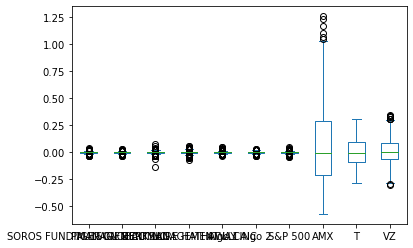

In [39]:
# RISK
# Box plot to visually show risk
custom_whale.plot.box()

In [40]:
# Calculate annualized Sharpe Ratios
# Calculate Sharpe Ratio
sharpe_ratios = (custom_whale.mean() * 252) / (custom_whale.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
AMX                            2.422758
T                              0.940000
VZ                             0.893409
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

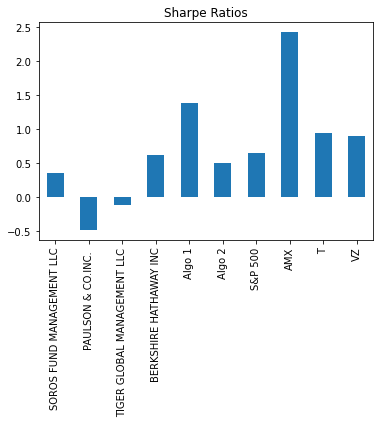

In [41]:
# Plot sharpe ratios
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [42]:
# Create a correlation analysis
correlation = custom_whale.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AMX,T,VZ
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864,NaN,NaN,NaN
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732,NaN,NaN,NaN
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946,NaN,NaN,NaN
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371,NaN,NaN,NaN
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494,NaN,NaN,NaN
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764,NaN,NaN,NaN
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000,NaN,NaN,NaN
AMX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.179335,-0.528323
T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.179335,1.000000,-0.047488
VZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.528323,-0.047488,1.000000


In [43]:
# Calculate Beta for this custom whale portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)

# Calculate covariance of all daily returns of MY CUSTOM WHALE vs. S&P 500
covariance = custom_whale['AMX'].cov(daily_returns['S&P 500'])
covariance

nan

In [44]:
# Calculate variance of all daily returns of AMX vs. S&P 500
variance = custom_whale['S&P 500'].var()
variance

7.316632424648712e-05

In [45]:
# Calculate beta of all daily returns of your Custom Whale
beta = covariance / variance
beta

nan

># Portfolio Analysis

### This portfolio analysis does not reflect current market conditions as of the publication of this report on December 23, 2021.
### All data analyzed for all the below portfolios were between the dates of:
### October 1, 2012 to April 23, 2019 or a time period of :
### ( 6 years, 6 months, 23 days).
### The Standard and Poor's 500, (or the S&P 500), is a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States. It is one of the most commonly followed equity indices and covers approximately 80% of available market capitalization. 

># Standard Deviation

### Standard Deviation can show the consistency of an investment's return over time.
### A fund with a high Standard Deviation shows price volatility.
### A fund with a low Standard Deviation tends to be more predictable.
### Regarding the below investments:
### To answer the question: 

##     (Which investments are more speculative than the S&P 500)?


- SOROS FUND MANAGEMENT LLC |   0.125335 
- PAULSON & CO.INC.         |   0.111488 
- TIGER GLOBAL MANAGEMENT LLC | 0.172936
- BERKSHIRE HATHAWAY INC      | 0.205077
- Algo 1 |                      0.120967
- Algo 2 |                      0.132430
- S&P 500 |                     0.135786

### Berkshire Hathaway Inc., with a Standard Deviation of (0.2050) and Tiger Global Management with a Standard Deviation of (0.1729) are both more speculative than the S&P 500 with a  Standard Deviation of (0.1357). 
### All other investments have a Standard Deviation which are lower than the S&P 500.

># Sharp Ratio

### The Sharp Ratio describes how much excess return an investor receives for the extra volatility they endure for holding a riskier asset.
### A Sharp Ratio of 1 or better is good, 2 or better is very good, and 3 or better is excellent. 
### Regarding the below Sharp Ratios:

- SOROS FUND MANAGEMENT LLC |     0.356417
- PAULSON & CO.INC. |            -0.483570
- TIGER GLOBAL MANAGEMENT LLC |  -0.121060
- BERKSHIRE HATHAWAY INC |        0.621810
- Algo 1 |                        1.378648
- Algo 2 |                        0.501364
- S&P 500 |                       0.648267
- AMX |                           2.422758
- T |                             0.940000
- VZ |                            0.893409


### In the above examples, the better investments are the ones with a higher Sharp Ratio: 
### The 4 investments below have a higher Sharp Ratio than the S&P 500 at (0.6482). The S&P 500 is still a good invesment with a 
### Sharp Ratio of (0.6482). 

- AMX (America Movil) | 2.422
- Algo 1 | 1.378
- T (AT&T) | .940
- VZ (Verizon) | .8934


### To answer the question:
### Determine whether the alogrithmic strategies outperform both the market (S&P 500) and thw Whale Portfilios.
### Excluding the three securities I choose to add (AMX, T, and VZ), and just looking at the Algo 1 and Algo 2 algorithmic strategies, and comparing them the S&P and Whale Portfilios, Algo 1 was the top performer with a Sharp Ratio of (1.378), Algo 1 outperformed all of the Whale Portfilios below and the S&P 500.

- Algo 1 | 1.378
- S&P 500 | 0.6482
- Berkshire Hathaway | 0.6218
- Soros | 0.3564
- Tiger -0.1210
- Paulson |-0.4835

### Conversely, Algo 2 with a Sharp Ratio of 0.5013, did not outperform Berkshire Hathaway (0.6218), or the S&P 500 ( 0.6482), or Algo 1 (1.3786).

### Ranking the best investments based on their Sharp Ratio:

- AMX (America Movil) | 2.422
- Algo 1 | 1.3786
- T (At&T) 0.940
- VZ (Verizon) | 0.8934
- S&P 500 | 0.6482
- Berkshire Hathaway | 0.6218
- Algo 2 | 0.5013
- SOROS FUND MANAGEMENT LLC | 0.356417


># Portfolio Analysis

### This portfolio analysis does not reflect current market conditions as of the publication of this report on December 23, 2021.
### All data analyzed for all the below portfolios were between the dates of:
### October 1, 2012 to April 23, 2019 or a time period of :
### ( 6 years, 6 months, 23 days).
### The Standard and Poor's 500, (or the S&P 500), is a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States. It is one of the most commonly followed equity indices and covers approximately 80% of available market capitalization. 

># Standard Deviation

### Standard Deviation can show the consistency of an investment's return over time.
### A fund with a high Standard Deviation shows price volatility.
### A fund with a low Standard Deviation tends to be more predictable.
### Regarding the below investments:
### To answer the question: 

##     (Which investments are more speculative than the S&P 500)?


- SOROS FUND MANAGEMENT LLC |   0.125335 
- PAULSON & CO.INC.         |   0.111488 
- TIGER GLOBAL MANAGEMENT LLC | 0.172936
- BERKSHIRE HATHAWAY INC      | 0.205077
- Algo 1 |                      0.120967
- Algo 2 |                      0.132430
- S&P 500 |                     0.135786

### Berkshire Hathaway Inc., with a Standard Deviation of (0.2050) and Tiger Global Management with a Standard Deviation of (0.1729) are both more speculative than the S&P 500 with a  Standard Deviation of (0.1357). 
### All other investments have a Standard Deviation which are lower than the S&P 500.

># Sharp Ratio

### The Sharp Ratio describes how much excess return an investor receives for the extra volatility they endure for holding a riskier asset.
### A Sharp Ratio of 1 or better is good, 2 or better is very good, and 3 or better is excellent. 
### Regarding the below Sharp Ratios:

- SOROS FUND MANAGEMENT LLC |     0.356417
- PAULSON & CO.INC. |            -0.483570
- TIGER GLOBAL MANAGEMENT LLC |  -0.121060
- BERKSHIRE HATHAWAY INC |        0.621810
- Algo 1 |                        1.378648
- Algo 2 |                        0.501364
- S&P 500 |                       0.648267
- AMX |                           2.422758
- T |                             0.940000
- VZ |                            0.893409

### To answer the question:
### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
### In the above examples, the better investments are the ones with a higher Sharp Ratio: 
### The 4 investments below have a higher Sharp Ratio than the S&P 500 at (0.6482). The S&P 500 is still a good invesment with a 
### Sharp Ratio of (0.6482). 

- AMX (America Movil) | 2.422
- Algo 1 | 1.378
- T (AT&T) | .940
- VZ (Verizon) | .8934



### Excluding the three securities I choose to add (AMX, T, and VZ), and just looking at the Algo 1 and Algo 2 algorithmic strategies, and comparing them the S&P and Whale Portfilios, Algo 1 was the top performer with a Sharp Ratio of (1.378), Algo 1 outperformed all of the Whale Portfilios below and the S&P 500.

- Algo 1 | 1.378
- S&P 500 | 0.6482
- Berkshire Hathaway | 0.6218
- Soros | 0.3564
- Tiger -0.1210
- Paulson |-0.4835

### Conversely, Algo 2 with a Sharp Ratio of 0.5013, did not outperform Berkshire Hathaway (0.6218), or the S&P 500 ( 0.6482), or Algo 1 (1.3786).

### Ranking the best investments based on their Sharp Ratio:

- AMX (America Movil) | 2.422
- Algo 1 | 1.3786
- T (At&T) 0.940
- VZ (Verizon) | 0.8934
- S&P 500 | 0.6482
- Berkshire Hathaway | 0.6218
- Algo 2 | 0.5013
- SOROS FUND MANAGEMENT LLC | 0.356417
